In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os, copy

In [2]:
def gen_fdf_coeffs(fracdelay, filterlen, window='blackman'):
    n = np.arange(filterlen)
    h = np.sinc(n - filterlen//2 - fracdelay)
    if window == 'blackman':
        h *= np.blackman(filterlen)
    elif window in ('hann', 'hanning'):
        h *= np.hanning(filterlen)
    elif window == 'hamming':
        h *= np.hamming(filterlen)
    elif window == 'bartlett':
        h *= np.bartlett(filterlen)
    elif window not in (None, 'rectangular'):
        raise ValueError('Unknown window type')
    return h, filterlen//2

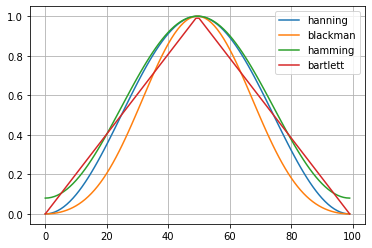

In [9]:
plt.plot(np.hanning(100), label='hanning')
plt.plot(np.blackman(100), label='blackman')
plt.plot(np.hamming(100), label='hamming')
plt.plot(np.bartlett(100), label='bartlett')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from numpy.fft import fft, rfft, ifft, irfft, fftfreq, rfftfreq

wintypes = ('blackman', 'hanning', 'hamming', 'bartlett', None)
fig, axs = plt.subplots(len(wintypes), 3, sharex=True, figsize=(15, 12))
for i in range(len(wintypes)):
    wintype = wintypes[i]
    h, intdelay = gen_fdf_coeffs(0.5, 15, window=wintype)
    axs[i,0].plot(h)
    axs[i,0].set_title(f'{wintype} window IR')
    axs[i,0].grid(True)
    axs[i,0].vlines(intdelay, -0.5, 1.5, 'r', '--')
    hfft = rfft(h)
    axs[i,1].plot(np.abs(hfft))
    axs[i,1].set_title(f'{wintype} window FR')
    axs[i,1].grid(True)
    axs[i,2].plot(np.angle(hfft) % np.pi)
    axs[i,2].set_title(f'{wintype} window FR phase')
    axs[i,2].grid(True)

plt.tight_layout()
plt.show()

In [3]:
%load_ext autoreload
%autoreload 2

In [17]:
from em.signal_utils import delay_signal
%matplotlib qt
ir = np.zeros(100)
ir[0] = 1.
irdy = delay_signal(ir, 41.5, 41)
plt.plot(ir, label='original')
plt.plot(irdy, label='delayed')
plt.legend()
plt.grid(True)
plt.show()